In [1]:
#Various imports
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, BasicAer, Aer
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity, Statevector
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector, plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

In [2]:
def qft(circ, q, d):
# circ is QuantumCircuit Object, q is QuantumRegister object, d is the number.
    for j in range(d):
        circ.h(q[j])
        for k in range(j+1,d):
            circ.cu1(pi/float(2**(k-j)), q[k], q[j])
        #circ.barrier()
def qftinv(circ, q, d):
# circ is QuantumCircuit Object, q is QuantumRegister object, d is the number.
    for j in range(d):
        circ.h(q[j])
        for k in range(j+1,d):
            circ.cu1(pi/float(2**(j-k)), q[k], q[j])
        #circ.barrier()

In [3]:
def Generate_Jordan_Circuit(n, n0, d):
    i_r = list(QuantumRegister(n) for i in range(d))
    i_r.append(QuantumRegister(n0))
    i_r.append(ClassicalRegister(d*n))
    circuit = QuantumCircuit(*i_r)
    o_r = list(i_r.pop(d))
    c_r = list(i_r.pop(d))
    for i in range(d):
        for j in range(n):
            circuit.h(i_r[i][j])
    circuit.x(o_r[n0-1])
    qft(circuit, o_r, n0)
    #This barrier is where we'll add the modular addition oracle A
    circuit.barrier()
    for i in range(d):
        qftinv(circuit, i_r[i], n)
    return circuit

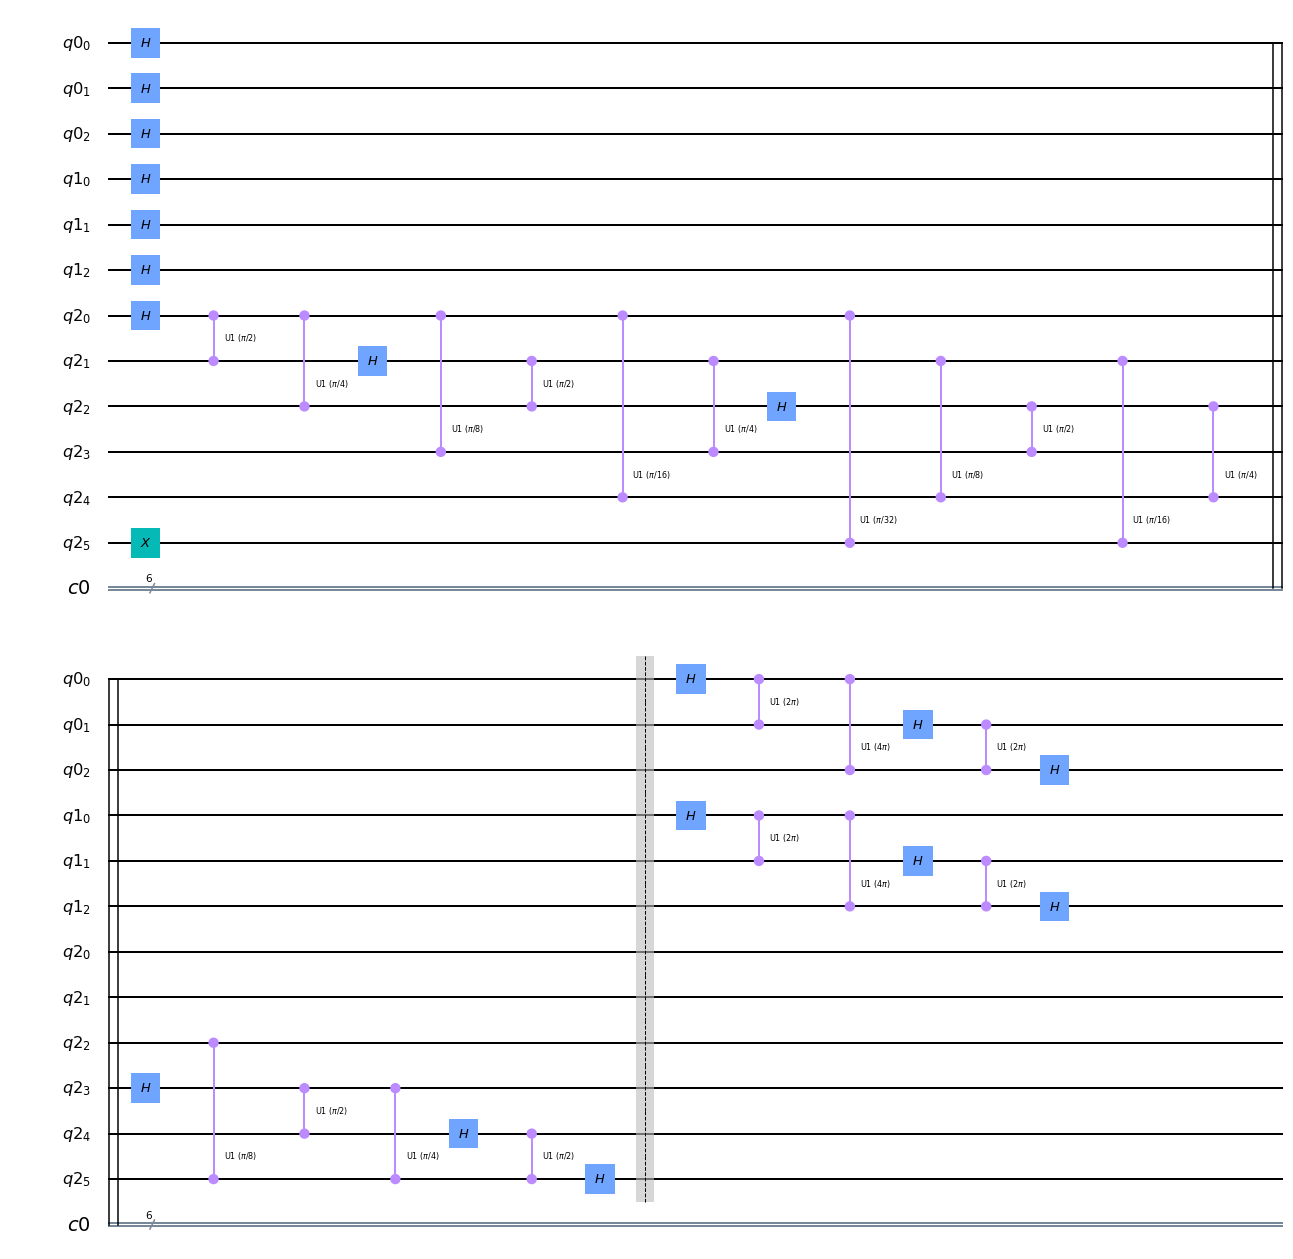

In [4]:
# define the number of qubits, dimension of the problem
n = 3
n0 = n + 3
d = 2
qc = Generate_Jordan_Circuit(n, n0, d)
# call the draw method to plot the circuit
qc.draw("mpl")